In [1]:
%pylab inline
import pandas as pd
import tqdm
from ipywidgets import *
plt.rcParams["font.size"]=20

Populating the interactive namespace from numpy and matplotlib


In [3]:
n_uc=108
df = pd.read_csv(f'data/out.graphene',sep=" ",names=["vx","vy","vz"]).to_numpy()
n_t=df.shape[0]//(n_uc**2*2)

In [4]:
A=df[0::2,:].reshape(n_t,n_uc,n_uc,3)[2:,:,:,:]
B=df[1::2,:].reshape(n_t,n_uc,n_uc,3)[2:,:,:,:]

In [13]:
i=0
w=250
FT=np.sum(abs(fft.ifft2(fft.rfft(A[i*w:(i+1)*w,:,:,:],axis=0),axes=(1,2))),axis=-1)+\
   np.sum(abs(fft.ifft2(fft.rfft(B[i*w:(i+1)*w,:,:,:],axis=0),axes=(1,2))),axis=-1)
while i<(n_t//w-1):
    i=i+1
    FT+=np.sum(abs(fft.ifft2(fft.rfft(A[i*w:(i+1)*w,:,:,:],axis=0),axes=(1,2))),axis=-1)+\
        np.sum(abs(fft.ifft2(fft.rfft(B[i*w:(i+1)*w,:,:,:],axis=0),axes=(1,2))),axis=-1)

dt=(1e-4)*100
w_max=1/dt
wran=linspace(0,w_max/2,FT.shape[0])*4.136
    

In [21]:
@interact(i=(0,FT.shape[0]-1))
def play(i=0):
    figure(figsize=(4,6),facecolor='black')
    b1,b2=array([1/2,sqrt(3)/2]),array([1/2,-sqrt(3)/2])
    x,y=meshgrid(linspace(0,1,n_uc),linspace(0,1,n_uc))
    pcolormesh(x*b1[0]+y*b2[0],
               x*b1[1]+y*b2[1],
        FT[i,:,:])
    plt.gca().set_facecolor("black")
    xticks([])
    yticks([])
    axis("equal");
    

interactive(children=(IntSlider(value=0, description='i', max=125), Output()), _dom_classes=('widget-interact'…

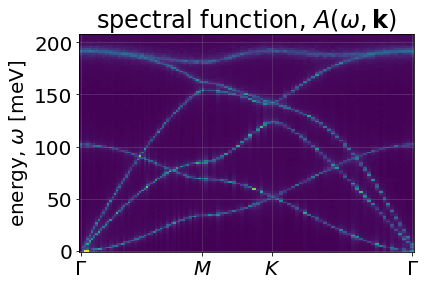

In [18]:
pcolormesh(hstack([linspace(0,1/2,n_uc//2),linspace(1/2,sqrt(3)/2+1/2,n_uc//2)]),
           wran,FT[:,arange(n_uc),n_uc//2-abs(arange(n_uc)-n_uc//2)])
grid(alpha=0.25)
ylabel("energy, $\omega$ [meV]")
title("spectral function, $A(\omega,\mathbf{k})$")

xticks([0,0.5,0.5+sqrt(3)/6,0.5+sqrt(3)/2],[r"$\Gamma$",r"$M$",r"$K$",r"$\Gamma$"]);

In [17]:
@interact(i=(0,n_uc-1))
def play(i=0):
    plot(wran,FT[:,arange(n_uc),n_uc//2-abs(arange(n_uc)-n_uc//2)][:,i])
    xlabel("energy, $\omega$ [meV]")
    ylabel("spectral function, $A(\omega,\mathbf{k})$")

    ylim(0,100)

interactive(children=(IntSlider(value=0, description='i', max=107), Output()), _dom_classes=('widget-interact'…

In [9]:
FT=np.sum(abs(fft.ifft2(fft.rfft(A,axis=0),axes=(1,2))),axis=-1)+\
   np.sum(abs(fft.ifft2(fft.rfft(B,axis=0),axes=(1,2))),axis=-1)

dt=(1e-4)*100
w_max=1/dt
wran=linspace(0,w_max/2,FT.shape[0])*4.136


In [16]:
@interact(i=(0,n_uc-1))
def play(i=0):
    plot(wran,FT[:,arange(n_uc),n_uc//2-abs(arange(n_uc)-n_uc//2)][:,i])
    xlabel("energy, $\omega$ [meV]")
    ylabel("spectral function, $A(\omega,\mathbf{k})$")
    ylim(1e-2,50)

interactive(children=(IntSlider(value=0, description='i', max=107), Output()), _dom_classes=('widget-interact'…

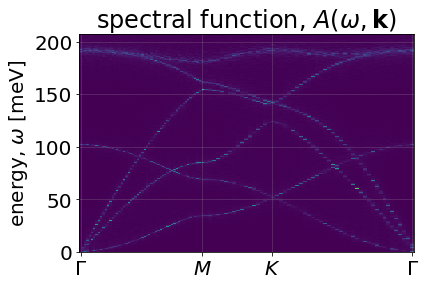

In [12]:
pcolormesh(hstack([linspace(0,1/2,n_uc//2),linspace(1/2,sqrt(3)/2+1/2,n_uc//2)]),
           wran,FT[:,arange(n_uc),n_uc//2-abs(arange(n_uc)-n_uc//2)]**1)
grid(alpha=0.25)
ylabel("energy, $\omega$ [meV]")
title("spectral function, $A(\omega,\mathbf{k})$")
xticks([0,0.5,0.5+sqrt(3)/6,0.5+sqrt(3)/2],[r"$\Gamma$",r"$M$",r"$K$",r"$\Gamma$"]);
